In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("Fertilizer_Prediction.csv")

In [3]:
df.head()

,Temparature,Humidity,Moisture,Soil Type,Crop Type,Nitrogen,Potassium,Phosphorous,Fertilizer Name
0,26,52,38,Sandy,Maize,37,0,0,Urea
1,29,52,45,Loamy,Sugarcane,12,0,36,DAP
2,34,65,62,Black,Cotton,7,9,30,14-35-14
3,32,62,34,Red,Tobacco,22,0,20,28-28
4,28,54,46,Clayey,Paddy,35,0,0,Urea


In [4]:
df.describe()

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,30.282828,59.151515,43.181818,18.909091,3.383838,18.606061
std,3.502304,5.840331,11.271568,11.599693,5.814667,13.476978
min,25.000000,50.000000,25.000000,4.000000,0.000000,0.000000
25%,28.000000,54.000000,34.000000,10.000000,0.000000,9.000000
50%,30.000000,60.000000,41.000000,13.000000,0.000000,19.000000
75%,33.000000,64.000000,50.500000,24.000000,7.500000,30.000000
max,38.000000,72.000000,65.000000,42.000000,19.000000,42.000000


In [5]:
df['Fertilizer Name'].unique()

array(['Urea', 'DAP', '14-35-14', '28-28', '17-17-17', '20-20',
       '10-26-26'], dtype=object)

<AxesSubplot:xlabel='Fertilizer Name', ylabel='count'>

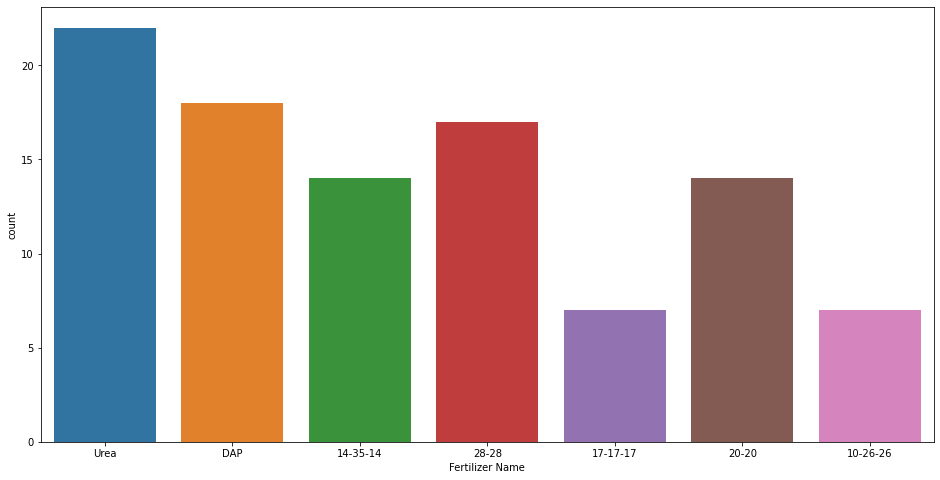

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(16,8))
sns.countplot(x='Fertilizer Name', data = df)

In [7]:
X = df.drop(columns=['Fertilizer Name'])
y = df['Fertilizer Name']

In [8]:
transformed_data = pd.get_dummies(X)

In [9]:
transformed_data

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous,Soil Type_Black,Soil Type_Clayey,Soil Type_Loamy,Soil Type_Red,...,Crop Type_Cotton,Crop Type_Ground Nuts,Crop Type_Maize,Crop Type_Millets,Crop Type_Oil seeds,Crop Type_Paddy,Crop Type_Pulses,Crop Type_Sugarcane,Crop Type_Tobacco,Crop Type_Wheat
0,26,52,38,37,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,29,52,45,12,0,36,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,34,65,62,7,9,30,1,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,32,62,34,22,0,20,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,28,54,46,35,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94,25,50,32,24,0,19,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
95,30,60,27,4,17,17,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
96,38,72,51,39,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
97,36,60,43,15,0,41,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [10]:
import sklearn
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(transformed_data,y,train_size=0.7,shuffle=True,random_state=42)

In [11]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [12]:
X_train[0]

array([-1.50323411, -1.54242294, -1.00710689,  0.46072126, -0.57643157,
        0.09092764, -0.48181206,  1.98206242, -0.59408853, -0.50452498,
       -0.41169348, -0.24806947, -0.33601075, -0.33601075, -0.17277369,
       -0.36214298, -0.24806947, -0.36214298,  3.24037035, -0.43549417,
       -0.24806947, -0.36214298])

In [13]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators=100,criterion = 'gini', random_state=42)
classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [14]:
y_pred = classifier.predict(X_test)

In [15]:
from sklearn.metrics import confusion_matrix,accuracy_score
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)

[[2 1 0 0 0 0 0]
 [0 4 0 0 0 0 0]
 [0 0 2 0 0 0 0]
 [0 0 0 1 0 0 0]
 [0 0 0 0 6 0 0]
 [0 0 0 0 0 7 0]
 [0 0 0 0 0 0 7]]


0.9666666666666667

In [16]:
from sklearn.preprocessing import LabelEncoder
encode_ferti = LabelEncoder()
df['Fertilizer Name']=encode_ferti.fit_transform(df['Fertilizer Name'])
#creating the dataframe
Fertilizer = pd.DataFrame(zip(encode_ferti.classes_,encode_ferti.transform(encode_ferti.classes_)),columns=['original','Encoded'])
Fertilizer = Fertilizer.set_index('original')
Fertilizer

,Encoded
original,
10-26-26,0
14-35-14,1
17-17-17,2
20-20,3
28-28,4
DAP,5
Urea,6


In [17]:
from sklearn.model_selection import train_test_split
Y_n = df['Fertilizer Name']
X_n = df.drop(columns=['Fertilizer Name','Soil Type','Crop Type'],axis=1)

X_n = pd.get_dummies(X_n)
x_train, x_test, y_train, y_test = train_test_split(X_n,Y_n,test_size=0.2,random_state=1)
print('Shape of Splitting :')
print('x_train = {}, y_train = {}, x_test = {}, y_test = {}'.format(x_train.shape,y_train.shape,x_test.shape,y_test.shape))

Shape of Splitting :
x_train = (79, 6), y_train = (79,), x_test = (20, 6), y_test = (20,)


In [18]:
X_n

,Temparature,Humidity,Moisture,Nitrogen,Potassium,Phosphorous
0,26,52,38,37,0,0
1,29,52,45,12,0,36
2,34,65,62,7,9,30
3,32,62,34,22,0,20
4,28,54,46,35,0,0
...,...,...,...,...,...,...
94,25,50,32,24,0,19
95,30,60,27,4,17,17
96,38,72,51,39,0,0
97,36,60,43,15,0,41


In [19]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 79 entries, 2 to 37
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Temparature  79 non-null     int64
 1   Humidity     79 non-null     int64
 2   Moisture     79 non-null     int64
 3   Nitrogen     79 non-null     int64
 4   Potassium    79 non-null     int64
 5   Phosphorous  79 non-null     int64
dtypes: int64(6)
memory usage: 4.3 KB


In [20]:
rand = RandomForestClassifier(random_state = 42)
rand.fit(x_train,y_train)

RandomForestClassifier(random_state=42)

In [21]:
pred_rand = rand.predict(x_test)

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

params = {
    'n_estimators':[300,400,500],
    'max_depth':[5,6,7],
    'min_samples_split':[2,5,8]
}
grid_rand = GridSearchCV(rand,params,cv=3,verbose=3,n_jobs=-1)

grid_rand.fit(x_train,y_train)

pred_rand = grid_rand.predict(x_test)

print(classification_report(y_test,pred_rand))

print('Best score : ',grid_rand.best_score_)
print('Best params : ',grid_rand.best_params_)

Fitting 3 folds for each of 27 candidates, totalling 81 fits
              precision    recall  f1-score   support

           0       1.00      0.33      0.50         3
           1       0.75      1.00      0.86         3
           2       0.67      1.00      0.80         2
           3       1.00      1.00      1.00         2
           4       1.00      1.00      1.00         2
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         6

    accuracy                           0.90        20
   macro avg       0.92      0.90      0.88        20
weighted avg       0.93      0.90      0.88        20

Best score :  1.0
Best params :  {'max_depth': 6, 'min_samples_split': 2, 'n_estimators': 300}


In [23]:
import pickle
pickle_out = open('new_classifier1.pkl', 'wb')
pickle.dump(grid_rand,pickle_out)
pickle_out.close()

In [24]:
model = pickle.load(open('new_classifier1.pkl', 'rb'))
ans = model.predict([[26,52,35,12,10,13]])
if ans[0] == 0:
    print("UREA")
elif ans[0] == 1:
    print("DAP")
elif ans[0] == 2:
    print("14-35-14")   
elif ans[0] == 3:
    print("28-28")
elif ans[0] == 4:
    print("17-17-17")
elif ans[0] == 5:
    print("20-20")
elif ans[0] == 6:
    print("10-26-26")
else:
    print("UREA")

14-35-14
